In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
arms = [0.15, 0.23, 0.37, 0.44, 0.5, 0.32, 0.78, 0.21, 0.82, 0.56, 0.34, 0.56, 0.84, 0.76, 0.43, 0.65, 0.73, 0.92, 0.10, 0.89, 0.48, 0.96, 0.60, 0.54, 0.49]
lenn=len(arms)
epsilon = 0.02
horizon = 102400

In [ ]:
np.arange

# $ \epsilon $ - Greedy

In [38]:
rng = np.random.default_rng(42)
pulls_till_now = np.zeros(lenn, dtype='uint32')
empirical_means = np.zeros(lenn)

In [39]:
i=1
while i<=horizon:
    if (rng.binomial(1, epsilon))==1:
        arm_index = rng.integers(lenn)
    else:
        arm_index = np.argmax(empirical_means)
    
    empirical_means[arm_index] = (empirical_means[arm_index] * pulls_till_now[arm_index] + rng.binomial(1, arms[arm_index]))/(pulls_till_now[arm_index]+1)
    pulls_till_now[arm_index]+=1
    i+=1

In [43]:
0.96*102400 - sum(pulls_till_now*empirical_means)

1052.000000000029

In [42]:
max(arms)

0.96

In [33]:
empirical_means

array([0.38841406, 0.80116826])

In [13]:
# in function form
def ep_greeedy(arms, randomSeed, epsilon, horizon):
    lenn=len(arms)
    cumu_reward=np.zeros(horizon)
    rng = np.random.default_rng(randomSeed)
    pulls_till_now = np.zeros(lenn, dtype='uint32')
    empirical_means = np.zeros(lenn)

    i=0
    while i<horizon:
        if (rng.binomial(1, epsilon))==1:
            arm_index = rng.integers(lenn)
        else:
            arm_index = np.argmax(empirical_means)
            
        curr_pull = rng.binomial(1, arms[arm_index])
        cumu_reward[i]=cumu_reward[i-1]+curr_pull
        empirical_means[arm_index] = (empirical_means[arm_index] * pulls_till_now[arm_index] + curr_pull)/(pulls_till_now[arm_index]+1)
        pulls_till_now[arm_index]+=1
        i+=1
    print(empirical_means)
    return cumu_reward

# UCB

In [44]:
arms = [0.15, 0.23, 0.37, 0.44, 0.5, 0.32, 0.78, 0.21, 0.82, 0.56, 0.34, 0.56, 0.84, 0.76, 0.43, 0.65, 0.73, 0.92, 0.10, 0.89, 0.48, 0.96, 0.60, 0.54, 0.49]
lenn=len(arms)
horizon = 102400
tot_rew = 0
curr_rew = 0
rng = np.random.default_rng(42)
empirical_means = np.zeros(lenn)

i=0
pulls_till_now = np.ones(lenn, dtype='uint32')
while i<lenn:
    curr_rew = rng.binomial(1, arms[i])
    tot_rew += curr_rew
    empirical_means[i] = curr_rew
    i+=1
    

while i<horizon:
    ucb = empirical_means + np.sqrt((2*np.log(i))/pulls_till_now)
    arm_index = np.argmax(ucb)
    curr_rew = rng.binomial(1, arms[arm_index])
    tot_rew += curr_rew

    empirical_means[arm_index] = (empirical_means[arm_index] * pulls_till_now[arm_index] + curr_rew)/(pulls_till_now[arm_index]+1)
    pulls_till_now[arm_index]+=1

    i+=1
    
(horizon * np.max(arms) - tot_rew)

1936.0

In [13]:
pulls_till_now

array([102318,     82], dtype=uint32)

In [14]:
empirical_means

array([0.69924158, 0.18292683])

In [15]:
tot_rew

71560

# Thompson Sampling

In [45]:
arms = [0.15, 0.23, 0.37, 0.44, 0.5, 0.32, 0.78, 0.21, 0.82, 0.56, 0.34, 0.56, 0.84, 0.76, 0.43, 0.65, 0.73, 0.92, 0.10, 0.89, 0.48, 0.96, 0.60, 0.54, 0.49]
horizon = 102400
lenn = len(arms)
rng = np.random.default_rng(42)
successesp1 = np.ones(lenn, dtype='uint32')
failuresp1 = np.ones(lenn, dtype='uint32')

i=1
while i<=horizon:
    arm_index = np.argmax(rng.beta(successesp1, failuresp1))
    if (rng.binomial(1, arms[arm_index]))==1:
        successesp1[arm_index]+=1
    else:
        failuresp1[arm_index]+=1
    i+=1

In [46]:
0.96*102400 - np.sum(successesp1-1)

100.0

In [17]:
successp1

NameError: name 'successp1' is not defined

# task 1 in function form

In [14]:
rwds = ep_greeedy([0.4, 0.3, 0.5, 0.2, 0.1], 0, 0.02, 102400)

[0.40168067 0.27160494 0.49927422 0.18844221 0.10238095]


# task 3

In [215]:
r_support = np.array([0, 0.25, 0.5, 0.75, 1])
arms = 3
instances = np.zeros((arms, len(r_support)))
instances[0] = [0.15, 0.15, 0.4, 0.1, 0.2]
instances[1] = [0.1, 0.2, 0.17, 0.43, 0.1]
instances[2] = [0.19, 0.41, 0.15, 0.15, 0.1]

#instances[0] = [0.1, 0.2, 0.17, 0.43, 0.1]
#instances[1] = [0.1, 0.2, 0.17, 0.43, 0.1]
#instances[2] = [0.1, 0.2, 0.17, 0.43, 0.1]

horizon = 400

In [197]:
r_support = np.array([0, 0.25, 0.5, 0.75, 1])
arms = 3
instances = np.zeros((arms, len(r_support)))
instances[0] = [0, 0.6, 0, 0.3, 0.1]
instances[1] = [0, 0, 0.8, 0.1, 0.1]
instances[2] = [0.2, 0.2, 0.3, 0.2, 0.1]
horizon = 25600

In [216]:
rng = np.random.default_rng(30)

In [217]:
#rng.choice(r_support, p=instances[1])  # arm pulled

In [218]:
pulls_till_now = np.zeros(arms, dtype='uint32')
empirical_means = np.zeros(arms)
epsilon=0.1

In [219]:
i=0
cumu_reward=np.zeros(horizon)
while i<horizon:
    if (rng.binomial(1, epsilon))==1:
        arm_index = rng.integers(arms)
    else:
        arm_index = np.argmax(empirical_means)
        
    rew_obt = rng.choice(r_support, p=instances[arm_index])
    cumu_reward[i]=cumu_reward[i-1]+rew_obt
    empirical_means[arm_index] = (empirical_means[arm_index] * pulls_till_now[arm_index] + rew_obt)/(pulls_till_now[arm_index]+1)
    pulls_till_now[arm_index]+=1
    i+=1


In [220]:
pulls_till_now

array([ 25, 353,  22], dtype=uint32)

In [221]:
empirical_means

array([0.48      , 0.57436261, 0.45454545])

In [222]:
np.sum(instances*r_support, axis=1)

array([0.5125, 0.5575, 0.39  ])

In [223]:
horizon*0.5575 - cumu_reward[-1]

-1.75

In [196]:
(735.75+834.25)/2

785.0

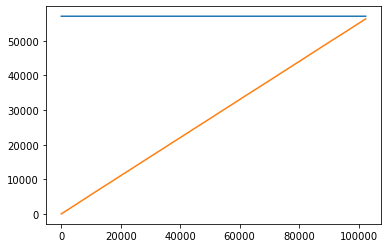

In [157]:
plt.plot(np.arange(horizon), [horizon*0.5575]*horizon)
plt.plot(np.arange(horizon), cumu_reward)


# task 4

In [172]:
threshold = 0.7
r_support = np.array([0, 0.25, 0.5, 0.75, 1])
threshold_index = np.where(r_support>=threshold)[0][0]
rng = np.random.default_rng(0)
arms = 3
instances = np.zeros((arms, len(r_support)))
instances[0] = [0., 0.02, 0., 0.98, 0.]
instances[1] = [0.98, 0.02, 0., 0., 0.]
instances[2] = [0.01, 0.99, 0, 0, 0]
horizon = 10000

In [51]:
threshold = 0.6
r_support = np.array([0, 0.25, 0.5, 0.75, 1])
threshold_index = np.where(r_support>=threshold)[0][0]
rng = np.random.default_rng(44)
arms = 3
instances = np.zeros((arms, len(r_support)))
#instances[0] = [0, 0.6, 0, 0.3, 0.1]
#instances[1] = [0, 0, 0.8, 0.1, 0.1]
#instances[2] = [0.2, 0.2, 0.3, 0.2, 0.1]
instances[0] = [0.15, 0.15, 0.4, 0.1, 0.2]
instances[1] = [0.1, 0.2, 0.17, 0.43, 0.1]
instances[2] = [0.19, 0.41, 0.15, 0.15, 0.1]
horizon = 102400

In [52]:
pulls_till_now = np.zeros(arms, dtype='uint32')
thresh_means = np.zeros(arms)
good_pulls = np.zeros(arms, dtype='uint32')
epsilon=0.1

In [53]:
i=0
cumu_reward=np.zeros(horizon)
highs=0

while i<horizon:
    if (rng.binomial(1, epsilon))==1:
        arm_index = rng.integers(arms)
    else:
        arm_index = np.argmax(thresh_means)
        
    rew_obt = rng.choice(r_support, p=instances[arm_index])
    cumu_reward[i]=cumu_reward[i-1]+rew_obt
    
    if (np.where(r_support == rew_obt)[0][0])>=threshold_index:
        good_pulls[arm_index]+=1
        highs+=1
    pulls_till_now[arm_index]+=1
    thresh_means[arm_index] = good_pulls[arm_index]/pulls_till_now[arm_index]
    i+=1

In [54]:
pulls_till_now

array([ 3411, 95597,  3392], dtype=uint32)

In [55]:
thresh_means

array([0.29991205, 0.53035137, 0.25294811])

In [56]:
highs

52581

In [57]:
good_pulls

array([ 1023, 50700,   858], dtype=uint32)

In [1]:
import os

In [2]:
os.getcwd()

'D:\\cs747_a1'

In [23]:
f = open('outputs.txt','a')

In [10]:
os.getcwd()

'D:\\cs747_a1'

In [11]:
import
for i range(10):
    !

SyntaxError: invalid syntax (Temp/ipykernel_15840/4151792006.py, line 1)

In [24]:
f.write('erererere\n')

10

In [25]:
f.close()

# KL-UCB

In [171]:
# use two approaches.. for fixed iterations for finding q.. non fixed (with tolerance level)
# machine epsilon?
arms = [0.15, 0.23, 0.37, 0.44, 0.5, 0.32, 0.78, 0.21, 0.82, 0.56, 0.34, 0.56, 0.84, 0.76, 0.43, 0.65, 0.73, 0.92, 0.10, 0.89, 0.48, 0.96, 0.60, 0.54, 0.49]
lenn=len(arms)
horizon = 25600
c=3

In [172]:
rng = np.random.default_rng(10)
empirical_means = np.zeros(lenn)
pulls_till_now = np.zeros(lenn, dtype='uint32')
eps = (np.finfo(float)).eps

i=0
while i<max(4, lenn):
        curr_rew = rng.binomial(1, arms[i%lenn])
        #cumu_reward[i] = cumu_reward[i-1] + curr_rew
        empirical_means[i%lenn] = (empirical_means[i%lenn] * pulls_till_now[i%lenn] + curr_rew)/(pulls_till_now[i%lenn]+1)
        pulls_till_now[i%lenn]+=1
        i+=1
        print(curr_rew)
    
#empirical_means/=5
print(empirical_means)

1
0
1
0
1
0
1
1
1
0
1
1
1
1
1
0
1
1
0
0
0
1
1
0
1
[1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0.
 1.]


In [173]:
kl_ucbs = np.zeros(lenn)
while i<horizon:
    #print(i)
    rhs_arms = (np.log(i) + c * np.log(np.log(i)))/pulls_till_now
    
    
    # BEGIN CALCULATION OF q's
    for z in range(lenn):
        rhs = rhs_arms[z]
        p = empirical_means[z]
        
        if p==1:
            q = 1
            
        elif p==0:
            left = p
            right = 1
            
            q_candidate = (p+1)/2
            kldiv = np.log(1/(1-q_candidate))
            
            while abs(kldiv-rhs)>0.0001:
                #time.sleep(1)
                #print(q_candidate, left, right, kldiv, rhs)
                if kldiv<rhs:
                    left = q_candidate
                else:
                    right = q_candidate
                q_candidate = (left+right)/2
                kldiv = np.log(1/(1-q_candidate))
                
            q = q_candidate
            
        else:
            left = p
            right = 1
            
            q_candidate = (p+1)/2
            kldiv = p*np.log(p/q_candidate) + (1-p)*np.log((1-p)/(1-q_candidate))
            
            while abs(kldiv-rhs)>0.0001:
                if kldiv<rhs:
                    left = q_candidate
                else:
                    right = q_candidate
                q_candidate = (left+right)/2
                kldiv = p*np.log(p/q_candidate) + (1-p)*np.log((1-p)/(1-q_candidate))
                
            q = q_candidate
            
        kl_ucbs[z] = q
        
    arm_index = np.argmax(kl_ucbs)
    empirical_means[arm_index] = (empirical_means[arm_index] * pulls_till_now[arm_index] + rng.binomial(1, arms[arm_index]))/(pulls_till_now[arm_index]+1)
    pulls_till_now[arm_index]+=1
    i+=1

In [174]:
0.96*25600 - sum(pulls_till_now*empirical_means)

237.00000000000364

In [101]:
empirical_means

array([0.25      , 0.79891963])

In [102]:
pulls_till_now

array([    28, 102372], dtype=uint32)

In [69]:
print(np.fmin(1-eps , pp))
print(np.fmax(eps , pp))

[1. 0. 1.]
[1.00000000e+00 2.22044605e-16 1.00000000e+00]


In [27]:
import numpy as np
12/np.array([1,3,4])

array([12.,  4.,  3.])

In [30]:
1 -np.array([1,2,3])

array([ 0, -1, -2])

In [13]:
a = np.array([1,2,3])
b=a
b[2] = 4
a

array([1, 2, 4])

In [154]:
import os
os.getcwd()

'D:\\cs747_a1'

In [163]:
f = open('../i-2.txt')

In [164]:
pp = f.read()

In [165]:
pp

'0 0.25 0.5 0.75 1\n0.15 0.15 0.4 0.1 0.2\n0.1 0.2 0.17 0.43 0.1\n0.19 0.41 0.15 0.15 0.1'

In [168]:
pp = pp.split('\n')

In [170]:
np.array(pp[0].split())

['0', '0.25', '0.5', '0.75', '1']

In [161]:
pp.astype(float)

array([0.15, 0.23, 0.37, 0.44, 0.5 , 0.32, 0.78, 0.21, 0.82, 0.56, 0.34,
       0.56, 0.84, 0.76, 0.43, 0.65, 0.73, 0.92, 0.1 , 0.89, 0.48, 0.96,
       0.6 , 0.54, 0.49])

In [162]:
pp

array(['0.15', '0.23', '0.37', '0.44', '0.50', '0.32', '0.78', '0.21',
       '0.82', '0.56', '0.34', '0.56', '0.84', '0.76', '0.43', '0.65',
       '0.73', '0.92', '0.10', '0.89', '0.48', '0.96', '0.60', '0.54',
       '0.49'], dtype='<U4')

In [145]:
import argparse

In [146]:
parser = argparse.ArgumentParser()
parser.add_argument()

In [147]:
ra  = 'ucb-t1'

In [148]:
ra[-2:]

't1'

In [149]:
1.0 == 1

True